<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/04_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# 판다스의 unique() 메소드를 이용하여 Species 열에서 고유한 값을 추출할 수 있음
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [5]:
# 데이터 프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환됨, 이를 to_numpy()메소드로 넘파이 배열로 바꾸어 저장
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()

In [28]:
# 훈련 세트, 테스트 세트 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [9]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k-최근접 이웃 분류기의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [11]:
# 사이킷 런에서는 문자열로 된 타깃값을 그대로 사용 가능하나, 알파벳 순서로 자동 정렬 됨.
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
# 사이킷런의 분류 모델은 predict_proba() 메소드로 클래스별 확률값을 반환함
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))
# 사이킷 런에서는 문자열로 된 타깃값을 그대로 사용할 때, 알파벳 순서로 자동 정렬하므로, 순서대로 Bream, Parkki, Perch, ~ 순서이다
# 첫 번째 샘플의 경우 Bream 0., Parkki 0., Perch 1.의 확률을 가진다

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [22]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀

## 로지스틱 회귀는 선형 방정식을 학습함
  z = a*(weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f
  
  a,b,c,d,e는 가중치 또는 계수
  
  z는 어떤 값도 가능하지만 확률이 되려면 0~1사이 값이 되어야 함. z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸기 위해 '시그모이드 함수(로지스틱 함수)'를 사용함

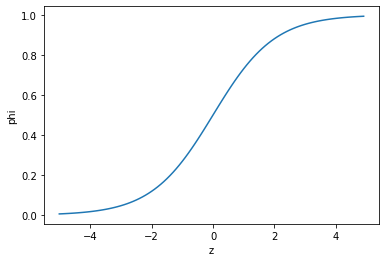

In [24]:
# 넘파이를 사용하여 -5와 5 사이에 0.1 간격으로 만든 배열 z를 다음 z위치마다 시그모이드 함수를 계산. np.exp() 메소드 사용
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [25]:
# 이진 분류를 이에 적용하면 0.5 초과일 때 양성, 이상일 때 음성으로 분류함
# 넘파이 배열을 True, False 값을 전달하여 행을 선택하는데, 이를 '불리언 인덱싱'이라고 함
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [30]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')   # 도미와 빙어인 것만 골라냄
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [36]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [37]:
print(lr.classes_)

['Bream' 'Smelt']


In [38]:
print(lr.predict_proba(train_bream_smelt[:5]))
# Bream이 음성, Smelt가 양성

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [39]:
# 선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인하면
print(lr.coef_, lr.intercept_)
# z = a*(weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f 식에 각각 대응함

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [41]:
# 선형 회귀모델에서는 decision_fuction() 메소드를 통해 z 값을 출력할 수 있음
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [43]:
# 얻어낸 z 값을  파이썬의 사이파이 라이브러리의 expit() 메소드를 통해 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
from scipy.special import expit
print(expit(decisions))
# decision_function() 메소드는 양성 클래스에 대한 z 값을 반환함

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀로 다중 분류 수행

In [45]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [46]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [47]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [48]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [50]:
print(lr.coef_.shape, lr.intercept_.shape)
# 다중부 분류는 클래스마다 z 값을 하나씩 계산하여 가장 높은 z를 출력하는 클래스가 예측 클래스가 됨
# 이진 분류의 경우 시그모읻 ㅡ함수를 사용하여 z 값을 0~1사이로 압축함
# 다중 분류는 시그모이드 함수가 아닌 '소프트맥스 함수'를 사용하여 여러 개의 선형 방젇ㅇ식의 출력값을 0~1사이로 압축하여 전체 합을 1으로 맞춤

(7, 5) (7,)


In [52]:
# 이진 분류와 같이 decision_function() 메소드로 z1~z7까지의 값을 구한 후 소프트맥스 함수를 사용해 확률로 바꾸어 보면
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
# 각 z1~z7의 값 확인 가능

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [53]:
from scipy.special import softmax
proba = softmax(decision, axis=1)   # axis=1을 통해 각 행, 즉 샘플에 대해 소프트맥스를 계산함
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 전체 소스 코드

# 로지스틱 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 럭키백의 확률

### 데이터 준비하기

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

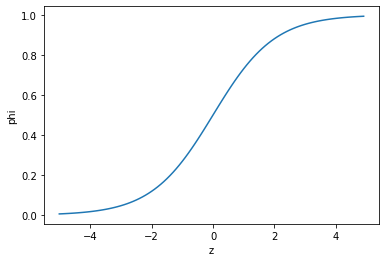

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 총정리

# 키워드
  ## 로지스틱 회귀
      선형 방정식을 사용한 분류 알고리즘, 선형 회귀와 달리 시그모이드, 소프트맥스 함수를 사용하여 클래스 확률 출력 가능

  ## 다중 분류
      타깃 클래스가 2개 이상인 분류 문제, 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측함

  ## 시그모이드 함수
      선형 방정식의 출력을 0과 1 사이의 값으로 압축, 이진 분류를 위해 사용함

  ## 소프트맥스 함수
      다중 분류에서 여러 선형 방정식의 출력 겨로가를 정규화하여 총합이 1이 되도록 만듦

# 핵심 패키지와 함수
  ## 사이킷 런
  ### LogisticRegression
        선형 분류 알고리즘인 로지스틱 회귀를 위한 클래스
        penalty 매개변수를 통해 L2 규제(릿지), L1 규제(라쏘)를 선택할 수 있음, 디폴트는 L2.
        C 매개변수를 통해 규제의 강도를 제어할 수 있음, 디폴트는 1.0이며 규제와 반비례함.

  ## predict_proba()
        예측 확률을 반환하는 메소드
        이진 분류의 경우 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환
        다중 분류의 경우 샘플마다 모든 클래스에 대한 확률을 반환

  ## decision_function()
        모델이 학습한 선형 방정식의 출력을 반환
        이진 분류의 경우 양성 클래스의 확률이 반환함, 값이 0보다 크면 양성, 이하면 음성으로 예측
        다중 분류의 경우 각 클래스마다 선형 방정식을 계산, 가장 큰 값의 클래스가 예측 클래스가 됨 


# 팁
  ## print(kn.classes_)
      사이킷 런에서는 다중 분류에서 문자열로 된 타깃값을 그대로 사용할 수 있으나, 알파벳 순서로 자동 정렬되어 동작하기 때문에 kn.classes_ 속성의 출ㄹ격을 통해 확인 해보아야 함

  ## 로지스틱 회귀에서의 이진 분류 수행
  ### 불리언 인덱싱
      넘파이 배열은 '불리언 인덱싱'을 통해 True, False의 값을 전달하여 행을 선택할 수 있음.
      각 타깃의 설정과 or 연산자 | 를 통해 특정 타겟에 대한 행만을 골라낼 수 있음
      Ex) # 'Bream'을 True, 'Smelt'를 False로 설정 
          bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
          train_bream_smelt = train_scaled[bream_smelt_indexes]
          target_bream_smelt = train_target[bream_smlet_indexes]

  ### 시그모이드 함수 expit()
      선형 회귀에서 로지스틱 회귀가 학습한 계수의 경우
      print(lr.coef_, lr.intercept_)를 통해 확인할 수 있음
      이는 z에 관한 각 특성의 가중치를 나타내므로 이를 시그모이드 함수에 통과시켜 확률을 획득함
      각 샘플에에 대한 z의 출력은 
      decisions = lr.decision_function(train_bream_smelt[:5])
      print(desicions)를 통해 확인 가능하며
      사이파이의 스페셜 패키지를 임포트 하고 expit()을 통해 획득 가능함
      from scipy.special import expit
      print(expit(decisions))

  
  ## 로지스틱 회귀에서의 다중 분류 수행
  ### 소프트맥스 함수 softmax()
      decision = lr.decision_function(test_scaled[:5])
      print(np.round(decision, decimals=2))를 통해 테스트 샘플에 대한 z1~z7까지의 값을 구할 수 있음
      시그모이드드 함수와 같이 사이파이의 스페셜 패키지를 임포트 하고 softmax()를 통해 획득함
      from scipy.special import softmax
      proba = softmax(decision, axis=1)
      print(np.round(proba, decimals=3))